In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
volumes = pd.read_csv('../Data/stock_volumes.csv', index_col = 'date', parse_dates = True)
prices = pd.read_csv('../Data/stock_prices.csv', index_col = 'date', parse_dates = True)
info = pd.read_csv('../Data/stock_info.csv')
sp_listings = pd.read_csv('../Data/sp500_listings.csv')                   

In [4]:
#7,914 monthly periods and 1,242 stocks
print(f'volumes df shape: {volumes.shape}\n prices df shape: {prices.shape}')

volumes df shape: (7914, 1241)
 prices df shape: (7914, 1241)


In [5]:
#188,872 listings in total
print(f'sp_listings df shape: {sp_listings.shape}')

sp_listings df shape: (188872, 2)


In [6]:
info[info['ESTAT'] == 'ACT.']

,Instrument,MNEM,RIC,ISIN,NAME,ESTAT
4,916328,U:ABT,ABT,US0028241000,ABBOTT LABORATORIES,ACT.
6,936365,@AMD,AMD.O,US0079031078,ADVANCED MICRO DEVICES,ACT.
10,905271,U:APD,APD,US0091581068,AIR PRDS.& CHEMS.,ACT.
14,905113,U:HWM,HWM,US4432011082,HOWMET AEROSPACE,ACT.
18,905802,U:HES,HES,US42809H1077,HESS,ACT.
...,...,...,...,...,...,...
1236,131745,@PENN,PENN.O,US7075691094,PENN NAT.GAMING,ACT.
1237,69487D,@NXPI,NXPI.O,NL0009538784,NXP SEMICONDUCTORS,ACT.
1238,68157P,U:GNRC,GNRC.K,US3687361044,GENERAC HOLDINGS,ACT.
1239,9110RA,@CZR,CZR.O,US12769G1004,CAESARS ENTERTAINMENT,ACT.


In [7]:
prices.columns

Index(['905270', '921795', '904261', '905261', '916328', '923024', '936365',
       '902355', '912215', '929813',
       ...
       '9889RL', '69568X', '543755', '77463M', '29235J', '131745', '69487D',
       '68157P', '9110RA', '292703'],
      dtype='object', length=1241)

In [8]:
prices.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,22.75,12.63,30.00,29.61,3.8736,11.00,4.1250,24.50,58.00,19.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,22.56,12.57,31.50,29.37,3.8876,11.00,4.0000,24.50,57.75,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,22.38,12.41,32.25,28.89,3.8806,11.38,3.9375,24.63,57.88,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,21.81,12.60,32.13,28.41,3.8387,11.50,3.8125,24.75,57.50,18.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,22.25,12.49,32.13,29.13,3.8387,11.50,3.8125,25.00,57.75,19.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Data frame to hold returns
daily_r = prices.copy(deep = True)

#Convert prices into daily returns
for col in daily_r.columns:
    daily_r[col] = daily_r[col].pct_change()*100

In [10]:
prices.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,22.75,12.63,30.00,29.61,3.8736,11.00,4.1250,24.50,58.00,19.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,22.56,12.57,31.50,29.37,3.8876,11.00,4.0000,24.50,57.75,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,22.38,12.41,32.25,28.89,3.8806,11.38,3.9375,24.63,57.88,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,21.81,12.60,32.13,28.41,3.8387,11.50,3.8125,24.75,57.50,18.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,22.25,12.49,32.13,29.13,3.8387,11.50,3.8125,25.00,57.75,19.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
daily_r.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,-0.835165,-0.475059,5.000000,-0.810537,0.361421,0.000000,-3.030303,0.000000,-0.431034,-1.315789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,-0.797872,-1.272872,2.380952,-1.634321,-0.180060,3.454545,-1.562500,0.530612,0.225108,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,-2.546917,1.531023,-0.372093,-1.661475,-1.079730,1.054482,-3.174603,0.487211,-0.656531,-1.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,2.017423,-0.873016,0.000000,2.534319,0.000000,0.000000,0.000000,1.010101,0.434783,3.405405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Resample to weekly
weekly_r = prices.resample('W').mean()

#Convert prices into weekly returns
for col in weekly_r.columns:
    weekly_r[col] = weekly_r[col].pct_change()*100

In [13]:
weekly_r.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-14,-2.176536,-4.592711,2.167143,-2.043344,-1.896709,0.285205,-3.622047,0.841634,-1.828408,-2.378667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-21,-0.849781,-1.285905,-2.724558,-4.860233,-1.693567,-5.545681,-0.980392,-1.516007,-5.285054,-4.927885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-28,3.160999,1.184233,-11.740632,-4.709877,-1.761860,-4.704554,-0.990099,-4.396954,-7.400238,-0.436731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-04,1.170270,-4.698211,0.449210,-4.315153,-0.877093,-1.481043,-3.666667,3.537170,-0.253256,1.743045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Running linear regression on a sample stock
import datetime as dt

weekly_no_index = weekly_r.reset_index()
weekly_no_index["date"] = weekly_no_index.date.map(dt.datetime.toordinal)

weekly_no_index[["date", "936365"]]

,date,936365
0,726474,NaN
1,726481,-3.622047
2,726488,-0.980392
3,726495,-0.990099
4,726502,-3.666667
...,...,...
1634,737912,4.051410
1635,737919,-6.778209
1636,737926,-4.225280
1637,737933,1.442128


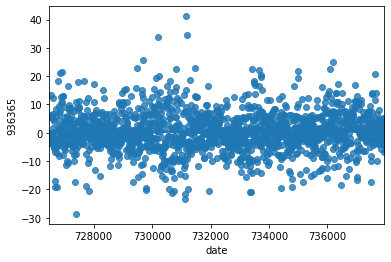

In [15]:
sns.regplot(data=weekly_no_index, x="date", y="936365")

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
new_df = weekly_no_index[~weekly_no_index["936365"].isna()]
model.fit(X=new_df[["date"]], y=new_df["936365"])

LinearRegression()

In [17]:
print("Line formula for 936365: \nreturn = " + str(model.intercept_) + " + " +
      str(model.coef_[0]) + " * date")

Line formula for 936365: 
return = -21.846821045157913 + 3.0427665472240984e-05 * date


In [18]:
model.predict(pd.DataFrame([[737947]]))[0]

0.6071834070859055

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
predictions = {}

def linear_predict(stock):
    new_df = weekly_no_index[["date", stock]]
    new_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    new_df = new_df[~new_df[stock].isna()]
    if new_df.shape[0] != 0:
        model.fit(X=new_df[["date"]], y=new_df[stock])
        print("Line formula for " + stock + ": \n\treturn = " + str(model.intercept_) + " + " +
              str(model.coef_[0]) + " * date")
        predictions[stock] = model.predict(pd.DataFrame([[737969]]))[0]
        y_pred = model.predict(new_df[["date"]])
        print("\tr2 score: " + str(r2_score(y_true=new_df[stock], y_pred=y_pred)))

In [20]:
current_stocks = weekly_no_index.columns[weekly_no_index.iloc[-1] != 0][1:]

for stock in current_stocks:
    linear_predict(stock)

Line formula for 916328: 
	return = 1.8237969622087267 + -2.160673182118806e-06 * date
	r2 score: 7.666803983008563e-06
Line formula for 936365: 
	return = -21.846821045157913 + 3.0427665472240984e-05 * date
	r2 score: 0.0002014708249141739
Line formula for 905271: 
	return = -1.194664876694092 + 1.963034096719461e-06 * date
	r2 score: 4.8880366928516494e-06
Line formula for 905113: 
	return = -2.3372183214951407 + 3.3925288405958527e-06 * date
	r2 score: 6.325314360178247e-06
Line formula for 905802: 
	return = -12.143692416806738 + 1.683760005030197e-05 * date
	r2 score: 0.00019097182515082078
Line formula for 905425: 
	return = -9.887413035642494 + 1.3627548445046124e-05 * date
	r2 score: 0.0003269221723332105
Line formula for 906156: 
	return = -3.6761854967453527 + 5.356033827743527e-06 * date
	r2 score: 2.2719329404785604e-05
Line formula for 916305: 
	return = 21.276949212950203 + -2.884751684495059e-05 * date
	r2 score: 0.00018566583147794358
Line formula for 992816: 
	return =

Line formula for 905801: 
	return = 9.64576500489975 + -1.296507022755474e-05 * date
	r2 score: 0.0004180977847366707
Line formula for 905125: 
	return = -1.5838306912597995 + 2.5873088445336084e-06 * date
	r2 score: 2.0939900341465645e-06
Line formula for 906511: 
	return = -8.467491138714216 + 1.1766233152557062e-05 * date
	r2 score: 0.0002605016441915575
Line formula for 904837: 
	return = -5.658232379033899 + 7.904154484048318e-06 * date
	r2 score: 2.4724743602377863e-05
Line formula for 905898: 
	return = -4.541527531083278 + 6.547289279520103e-06 * date
	r2 score: 4.898302663902676e-05
Line formula for 904678: 
	return = 7.328477120202476 + -9.769405508671422e-06 * date
	r2 score: 4.348201117032602e-05
Line formula for 905409: 
	return = -10.302385619897878 + 1.4447752933843627e-05 * date
	r2 score: 0.0001771904211504971
Line formula for 944195: 
	return = 235.87770091563587 + -0.00032369111792654556 * date
	r2 score: 0.0022236663558218295
Line formula for 912030: 
	return = 5.37

Line formula for 906069: 
	return = -5.892063160928308 + 8.362969965110663e-06 * date
	r2 score: 5.145753421997856e-05
Line formula for 907624: 
	return = -12.145032272331182 + 1.670888881333576e-05 * date
	r2 score: 0.00030568890915072533
Line formula for 912228: 
	return = 14.041161100570282 + -1.890988197412651e-05 * date
	r2 score: 0.0007652410097873652
Line formula for 902321: 
	return = -7.432490093256838 + 1.0317264532326912e-05 * date
	r2 score: 0.00018263613025903958
Line formula for 912518: 
	return = 4.863146730977026 + -6.164091234614576e-06 * date
	r2 score: 1.6642618020590305e-05
Line formula for 923497: 
	return = -2.3223847729670006 + 3.3111628321954575e-06 * date
	r2 score: 2.424004471257568e-06
Line formula for 902233: 
	return = -3.66904024825911 + 5.408361170255514e-06 * date
	r2 score: 2.619207139953339e-05
Line formula for 518197: 
	return = 21.009309261592776 + -2.8573739995334973e-05 * date
	r2 score: 0.0010290117421797307
Line formula for 906284: 
	return = -4.

	r2 score: 0.00037368966841422324
Line formula for 546814: 
	return = 20.37961326909556 + -2.7584758833495866e-05 * date
	r2 score: 0.000308376014963363
Line formula for 902107: 
	return = 7.60116525603872 + -1.0246451535926157e-05 * date
	r2 score: 0.00017661297664173237
Line formula for 922964: 
	return = 9.80751793750067 + -1.313513653732133e-05 * date
	r2 score: 0.0001385687397605917
Line formula for 867871: 
	return = 6.124802556151626 + -8.051376436127893e-06 * date
	r2 score: 1.5686425921979108e-05
Line formula for 997198: 
	return = 11.147137421496474 + -1.4889766450772516e-05 * date
	r2 score: 0.00011103497382958238
Line formula for 922817: 
	return = -12.793885050392229 + 1.779323486933079e-05 * date
	r2 score: 0.000354436175281303
Line formula for 874114: 
	return = -32.892927257381416 + 4.5006679075715746e-05 * date
	r2 score: 0.00044895494164109984
Line formula for 545534: 
	return = 12.137968964682882 + -1.616961531661694e-05 * date
	r2 score: 5.1707019104174634e-05
Line 

Line formula for 877072: 
	return = -19.85785602956887 + 2.739911368653167e-05 * date
	r2 score: 0.00023419308519656568
Line formula for 771830: 
	return = 53.67250424122091 + -7.271868818809922e-05 * date
	r2 score: 0.002733446890080038
Line formula for 277642: 
	return = -31.789841478634173 + 4.3666932845280905e-05 * date
	r2 score: 0.00039521936368502875
Line formula for 328426: 
	return = 52.57364912948227 + -7.119836764234305e-05 * date
	r2 score: 0.000939441775540617
Line formula for 326143: 
	return = 34.931483533147826 + -4.704380202769975e-05 * date
	r2 score: 0.0013190976951318323
Line formula for 357344: 
	return = 78.55087707866532 + -0.00010661330593734015 * date
	r2 score: 0.002124472549791423
Line formula for 271980: 
	return = 25.181364039683448 + -3.412238859605089e-05 * date
	r2 score: 0.0005820384082437791
Line formula for 916532: 
	return = 42.70651318474208 + -5.798371373073717e-05 * date
	r2 score: 0.0008012127992313989
Line formula for 500373: 
	return = 7.833775

	r2 score: 0.0005720462612166521
Line formula for 699943: 
	return = 71.76050051243094 + -9.745727369747438e-05 * date
	r2 score: 0.001306622527778245
Line formula for 26393N: 
	return = 86.09983110806813 + -0.00011665838840312075 * date
	r2 score: 0.003718000575584135
Line formula for 36269K: 
	return = -45.49566709474847 + 6.23390172979164e-05 * date
	r2 score: 0.00033878230170492074
Line formula for 41195M: 
	return = -9.303544037726626 + 1.2787949494784507e-05 * date
	r2 score: 3.5772245558618465e-05
Line formula for 28513N: 
	return = 31.378665338024994 + -4.209519728048474e-05 * date
	r2 score: 0.00019822935153368526
Line formula for 683199: 
	return = 160.7066795414368 + -0.00021814971945937527 * date
	r2 score: 0.009047513709229404
Line formula for 14015T: 
	return = -13.958456945535374 + 1.9383147673558153e-05 * date
	r2 score: 0.00018471911562478738
Line formula for 321354: 
	return = 16.371339356077275 + -2.1569264896966165e-05 * date
	r2 score: 0.00015600098017709563
Line f

Line formula for 877723: 
	return = -15.415441962706543 + 2.150823147445236e-05 * date
	r2 score: 8.644497224352676e-05
Line formula for 699628: 
	return = 96.20176967626583 + -0.0001303712165868996 * date
	r2 score: 0.0017312842715097032
Line formula for 15303X: 
	return = 17.269707404285935 + -2.239803490022795e-05 * date
	r2 score: 4.892203711237553e-05
Line formula for 274794: 
	return = 43.37242775068588 + -5.8508438951184384e-05 * date
	r2 score: 0.001438730646094788
Line formula for 32199R: 
	return = 40.58021713486618 + -5.4478140167908255e-05 * date
	r2 score: 0.0003899466744458069
Line formula for 286558: 
	return = -10.199334715465168 + 1.451305128372464e-05 * date
	r2 score: 8.616455792154198e-05
Line formula for 29920H: 
	return = 1022.9525688921016 + -0.0013948755561895758 * date
	r2 score: 0.021045279569161468
Line formula for 670129: 
	return = -26.55682055773989 + 3.647033636680248e-05 * date
	r2 score: 0.0006381176586964799
Line formula for 14352P: 
	return = -5.83759

Line formula for 945411: 
	return = -7.741430964714347 + 1.1015338105640221e-05 * date
	r2 score: 7.682615940651782e-05
Line formula for 14806F: 
	return = 25.519980067114496 + -3.431731505191949e-05 * date
	r2 score: 0.00040793416827256124
Line formula for 54060C: 
	return = -44.01967069239339 + 6.035611900398709e-05 * date
	r2 score: 0.0010169981838458186
Line formula for 96699P: 
	return = -357.43067756272006 + 0.00048521057867089226 * date
	r2 score: 0.005041742899541957
Line formula for 9801CJ: 
	return = -125.53319817618141 + 0.000170201651083423 * date
	r2 score: 0.0010291692960728849
Line formula for 9801CK: 
	return = -281.5701873314868 + 0.0003830856082240309 * date
	r2 score: 0.004469283950843228
Line formula for 312367: 
	return = 3.3088366051379876 + -3.886455125518553e-06 * date
	r2 score: 4.884368972168929e-06
Line formula for 32730D: 
	return = -4.1593340220578225 + 6.132010624176639e-06 * date
	r2 score: 1.5297021475069172e-06
Line formula for 89257J: 
	return = -254.7

	r2 score: 3.490008060280658e-05
Line formula for 91240W: 
	return = -385.8835625129936 + 0.0005242606971534252 * date
	r2 score: 0.004492504549475362
Line formula for 902305: 
	return = -13.634995443525021 + 1.8739677032848e-05 * date
	r2 score: 0.0006479990825087878
Line formula for 130591: 
	return = -3.7042199457756237 + 5.69003382439968e-06 * date
	r2 score: 1.4805461514222351e-05
Line formula for 8857RL: 
	return = 79.14333692073133 + -0.00010659422258620289 * date
	r2 score: 0.00026027091310965034
Line formula for 905652: 
	return = -19.071624820108752 + 2.6423910357607468e-05 * date
	r2 score: 0.000969831103408092
Line formula for 67888X: 
	return = -62.40287138558361 + 8.566436052063335e-05 * date
	r2 score: 0.0005973090443489593
Line formula for 9373MH: 
	return = 5.345340593702312 + -6.907450399744129e-06 * date
	r2 score: 5.1881232821404666e-05
Line formula for 701667: 
	return = 76.64715581931128 + -0.00010394343851213217 * date
	r2 score: 0.006541197520160358
Line formula

In [21]:
# Ordered list of stocks and their predicted returns
sorted_values = sorted(predictions.values(), reverse=True)

sorted_dict = {}
for i in sorted_values:
    for k in predictions.keys():
        if predictions[k] == i:
            sorted_dict[k] = predictions[k]
            break

count = 1
for stock in sorted_dict:
    stock_name = info.loc[info.Instrument == stock, "NAME"].values[0]
    if "DELIST" in stock_name:
        continue
    print(str(count) + ". " + stock_name + ": " + str(sorted_dict[stock]))
    count += 1

1. ENPHASE ENERGY: 3.0527725898091376
2. GAMESTOP 'A': 2.473489697285231
3. ETSY: 2.361854999513639
4. CAESARS ENTERTAINMENT: 1.6243070434935873
5. TESLA: 1.5944002786995952
6. ADIENT: 1.554214539173472
7. VONTIER: 1.5364066832735261
8. DOW ORD SHS: 1.3991023304372447
9. CORTEVA: 1.3760758442565475
10. BRIGHTHOUSE FINANCIAL: 1.2560972450362442
11. FOX A: 1.1357422114494966
12. PAYPAL HOLDINGS: 1.1351158839930235
13. FOX B: 1.0880348295534077
14. GENERAC HOLDINGS: 1.0422022201434231
15. DEXCOM: 1.0328113467536326
16. TWITTER: 1.0045799046224602
17. ALIGN TECHNOLOGY: 0.9891612420323668
18. UNDER ARMOUR 'C': 0.8941602893545451
19. MSCI: 0.8443145653066324
20. MARKETAXESS HOLDINGS: 0.8388926862905492
21. T-MOBILE US: 0.8262096760937254
22. FORTINET: 0.8147710834676616
23. KEYSIGHT TECHNOLOGIES: 0.8014106168086244
24. CATALENT: 0.7779503111995041
25. ALPHABET 'C': 0.776563074535801
26. APPLE: 0.7462058105913414
27. OLD DOMINION FGT.LINES: 0.7445898090188408
28. NETFLIX: 0.740651986999616
29

401. HOWMET AEROSPACE: 0.16636279447053992
402. DXC TECHNOLOGY: 0.16606350109523582
403. GILEAD SCIENCES: 0.1655215855803931
404. ALEXANDRIA RLST.EQTIES.: 0.1635313594519534
405. INVESCO: 0.1625176252061955
406. MCKESSON: 0.16246635133293985
407. MARATHON PETROLEUM: 0.1622207280129544
408. REGIONS FINL.NEW: 0.16220565926999997
409. FASTENAL: 0.16169451585413697
410. ZIMMER BIOMET HDG.: 0.1614244452866611
411. ANALOG DEVICES: 0.1604132100747684
412. J M SMUCKER: 0.16038517674831576
413. RAYTHEON TECHNOLOGIES: 0.16005437451510574
414. NISOURCE: 0.15990961579255147
415. FIFTH THIRD BANCORP: 0.15895136358633088
416. WELLTOWER: 0.15857169844439545
417. SIMON PROPERTY GROUP: 0.15788861090463158
418. AMEREN: 0.15744768191509806
419. MARATHON OIL: 0.1560758930380679
420. VIACOMCBS B: 0.1559876324135887
421. SOUTHWEST AIRLINES: 0.15517282434964486
422. EMERSON ELECTRIC: 0.1523563355300377
423. CLOROX: 0.15043860525118635
424. WILLIAMS: 0.15019726654618282
425. NEKTAR THERAPEUTICS: 0.14916104133